In [2]:
%run utils.ipynb

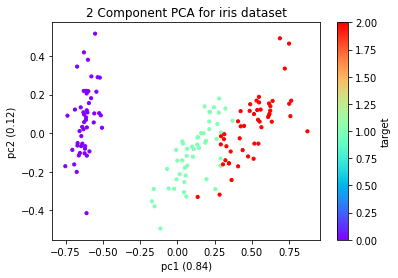

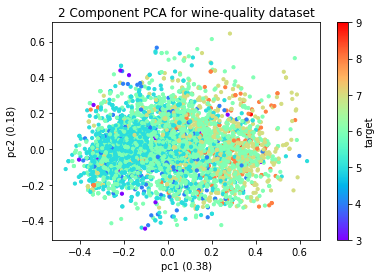

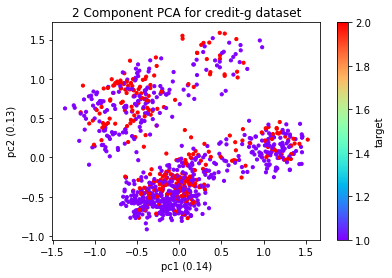

In [2]:
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
pca_scatter_two_component(idata['name'], idata['X'], idata['y'])
pca_scatter_two_component(wdata['name'], wdata['X'], wdata['y'])
pca_scatter_two_component(cdata['name'], cdata['X'], cdata['y'])

In [3]:
from IPython.display import display

ps = [.95,.90,.80,.70,.60,.50,.40,.30,.20,.10]

data = []
for p in ps:
#     data.append(pca_components(idata['name'], idata['X'], idata['y'], p))
    data.append(pca_components(wdata['name'], wdata['X'], wdata['y'], p))
    data.append(pca_components(cdata['name'], cdata['X'], cdata['y'], p))

df = pd.DataFrame(data)
df.principle_components = df.principle_components.astype(int)
pivot = df.pivot(index='variance', columns='dataset', values='principle_components')
# pivot.style.format({'variance': '{:,.2%}'.format})
display(pivot)
# pivot.plot()
# plt.yticks(df['principle_components'])

dataset,credit-g,wine-quality
variance,,
0.10,1,1
0.20,2,1
0.30,3,1
0.40,4,2
0.50,5,2
0.60,7,3
0.70,9,4
0.80,11,5
0.90,15,7


11
7
For n_clusters = 2 The average silhouette_score is : 0.3167579752442211
For n_clusters = 4 The average silhouette_score is : 0.2446157509721793


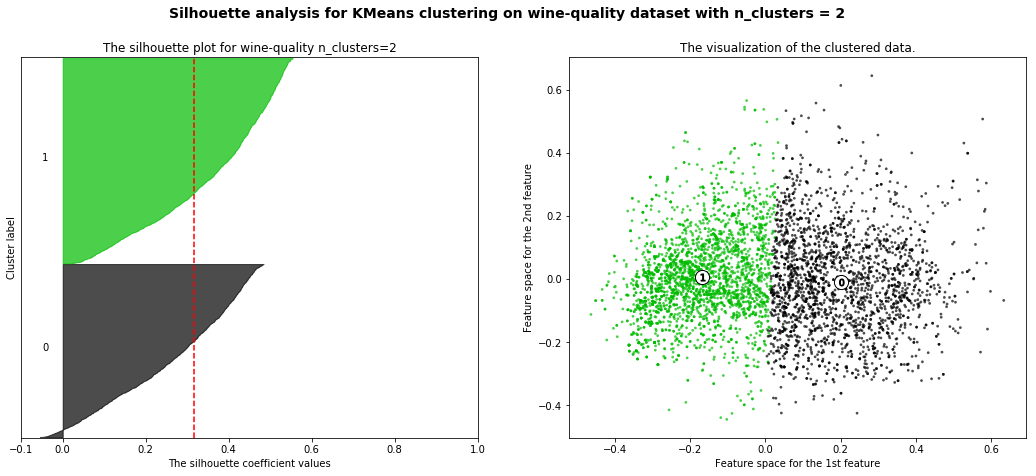

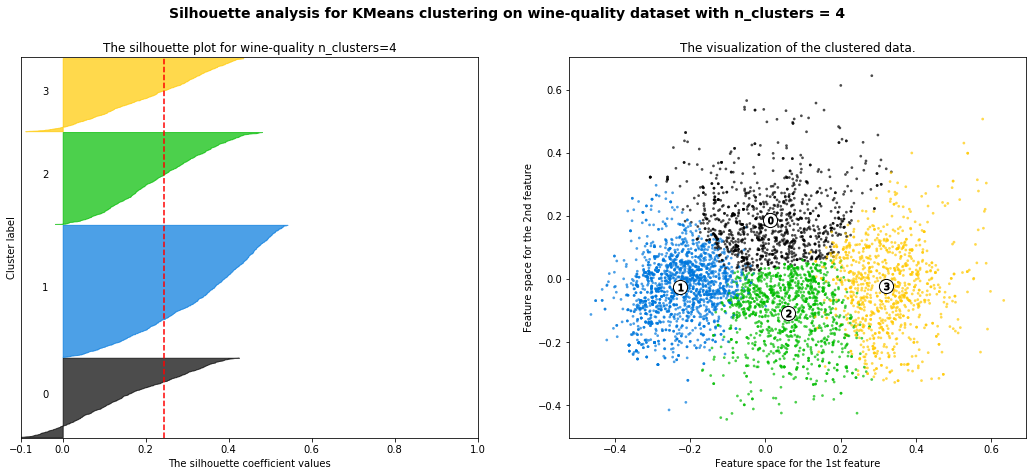

In [4]:
data = wdata
reduced_data = PCA(n_components=4).fit_transform(data['X'])
# kmeans = KMeans(init='k-means++', n_clusters=data['n_targets'], n_init=10)

print(data['n_features'])
print(data['n_targets'])
n_clusters_range = [2,4]
silhouette_plot(data['name'],n_clusters_range, reduced_data)



24
For n_clusters = 2 The average silhouette_score is : 0.16657487241060007


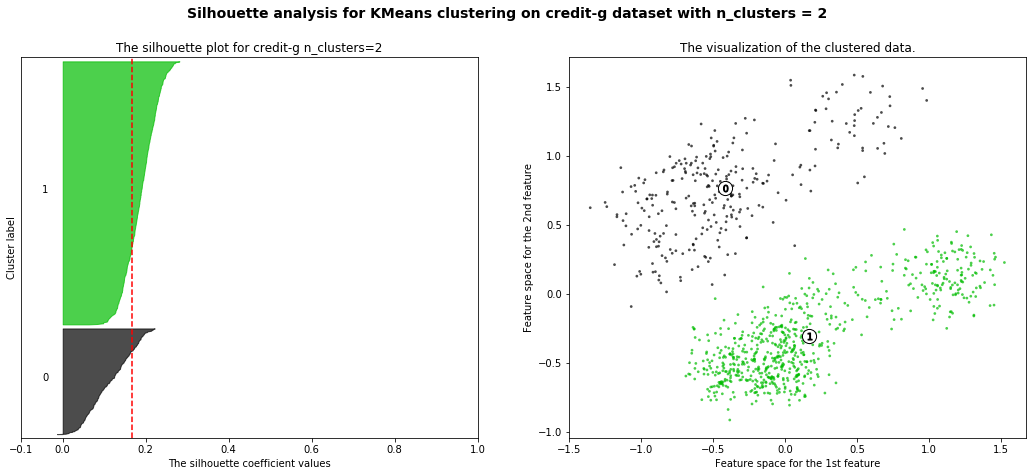

24
For n_clusters = 2 The average silhouette_score is : 0.27062233196480195


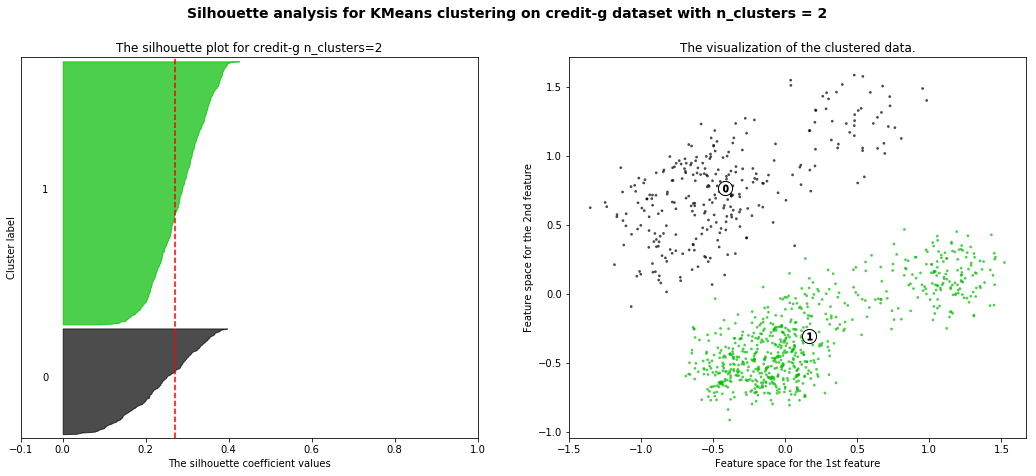

In [7]:
data = cdata
reduced_data = PCA(n_components=15).fit_transform(data['X'])
kmeans = KMeans(init='k-means++', n_clusters=data['n_targets'], n_init=10)

print(data['n_features'])
n_clusters_range = [2]
silhouette_plot(data['name'],n_clusters_range, reduced_data)

reduced_data = PCA(n_components=5).fit_transform(data['X'])
kmeans = KMeans(init='k-means++', n_clusters=data['n_targets'], n_init=10)

print(data['n_features'])
n_clusters_range = [2]
silhouette_plot(data['name'],n_clusters_range, reduced_data)

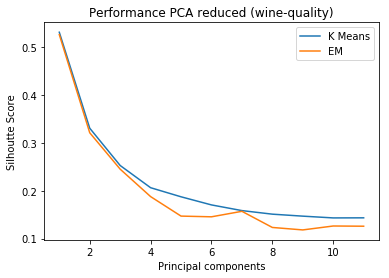

In [29]:
pca_performance(wdata)

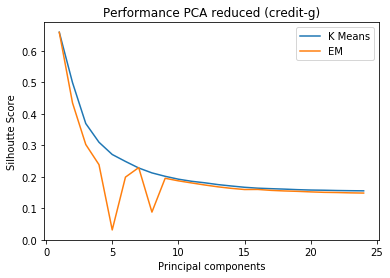

In [32]:
pca_performance(cdata)

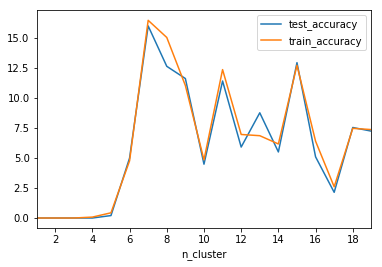

In [10]:
data = wdata

_vals = []
for i in range(1,20,1):
    n_clusters = i
    clf = KMeans(n_clusters=n_clusters, init='k-means++')
        
    clf.fit(data['X_train'])
    #Training accuracy
    y_train_pred = clf.predict(data['X_train'])
    train_accuracy = np.mean(y_train_pred.ravel() == data['y_train'].ravel()) * 100
#     print('Training accuracy for KMeans for K = {}:  {}'.format(n_clusters, train_accuracy))

    #Testing accuracy
    y_test_pred = clf.predict(data['X_test'])
    test_accuracy = np.mean(y_test_pred.ravel() == data['y_test'].ravel()) * 100
#     print('Testing accuracy for KMeans for K = {}:  {}'.format(n_clusters, test_accuracy))
    _vals.append({
        'n_cluster': n_clusters,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy
    })
    
df = pd.DataFrame(_vals)
df.plot(x='n_cluster')



In [22]:
data = cdata
reduced_data = PCA(n_components=7).fit_transform(data['X'])

kmeans = KMeans(init='k-means++', n_clusters=data['n_targets'], n_init=10)

kmeans.fit(data['X'])
kmeans_cluster_labels = kmeans.labels_
orig_pk = bench_k_means_nofit(kmeans, data['name'], data['X'], data['y'], kmeans_cluster_labels, data['n_samples'])


kmeans.fit(reduced_data)
kmeans_cluster_labels = kmeans.labels_
reduced_pk = bench_k_means_nofit(kmeans, data['name'], reduced_data, data['y'], kmeans_cluster_labels, data['n_samples'])




print(orig_pk)
print("------------")
print(reduced_pk)

{'init': 'credit-g', 'time': 0.0, 'accuracy': 0.527, 'precision': 0.517391304347826, 'recall': 0.527, 'f1_score': 0.5221514508138712, 'homogenity': 0.014409571330196791, 'completeness': 0.014684104206880677, 'v-measure': 0.014545542499051654, 'ARI': 0.05132520288375257, 'AMI': 0.01360021275937502, 'mutual_info': 0.008802292733530864, 'NMI': 0.014546190119377992, 'silhouette': 0.1553102389902605}
------------
{'init': 'credit-g', 'time': 9.5367431640625e-07, 'accuracy': 0.173, 'precision': 0.42195121951219516, 'recall': 0.173, 'f1_score': 0.2453900709219858, 'homogenity': 0.014409571330196791, 'completeness': 0.014684104206880677, 'v-measure': 0.014545542499051654, 'ARI': 0.05132520288375257, 'AMI': 0.01360021275937502, 'mutual_info': 0.008802292733530864, 'NMI': 0.014546190119377992, 'silhouette': 0.22779832099827055}
